# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



In [217]:
###########################################README File Explains the Process
with open('README.txt', 'r') as f:
    text = f.read()

print(text)

################################################################################################################################
###                                    Practical Application III: Comparing Classifiers                                      ###
###############################################Inital Investigation#############################################################
1. Read Dataset
2. Investigate the Dataset attributes: 
3. Investigate the dataset for missing or problematic data.
     ###Check Total Number of Records in Dataframe###
     ###Step 1: Duplicate Records###
     ###Step 2: Missing Data in attributes
4. Decide what to do about your missing data -- drop, replace, other...
     ###Plan of Action###
        1. Delete Duplicate Data Points/Records###
5. Transform data for modeling
6. Writeup Business Objectives
##########################################Gridsearch all models and obtain best parameters##############################
7. Gridsearch KNN/LogisticRegre

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
from datetime import date
import holidays

In [7]:
bank_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<Axes: >

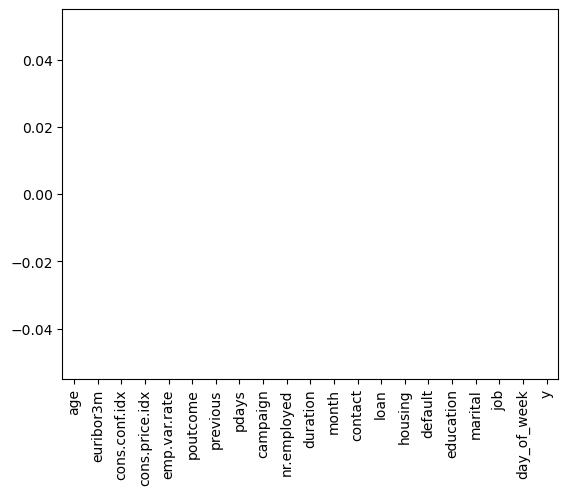

In [9]:
#checking nulls
bank_df.isnull().sum().sort_values().plot(kind = 'bar')

In [13]:
bank_df.shape

(41188, 21)

In [12]:
#find duplicates
bank_df.duplicated().value_counts()

False    41176
True        12
Name: count, dtype: int64

In [14]:
#drop duplicates
bank_df = bank_df.drop_duplicates()

In [15]:
bank_df.shape

(41176, 21)

In [16]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [18]:
#only 11% have subscribed for term deposit
bank_df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [21]:
#type of jobs of customers who subscribed term deposit 
bank_df[bank_df['y'] == 'yes']['job'].value_counts()

job
admin.           1351
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: count, dtype: int64

In [25]:
bank_df[bank_df['y'] == 'yes']['pdays'].value_counts()

pdays
999    3672
3       298
6       289
4        63
7        40
2        37
9        35
10       30
5        29
13       28
12       26
15       16
11       15
8        12
14       11
0        10
1         8
16        6
18        4
21        2
22        2
17        2
25        1
26        1
27        1
19        1
Name: count, dtype: int64

In [24]:
#96% of the people were not previously contacted
bank_df['pdays'].value_counts()

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [101]:
bank_df[bank_df['education']=='university.degree']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25,35,technician,married,university.degree,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28,54,technician,single,university.degree,unknown,no,no,telephone,may,mon,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
38,41,admin.,married,university.degree,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [87]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [102]:
bank_df = pd.get_dummies(bank_df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [106]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   campaign                       41176 non-null  int64  
 2   pdays                          41176 non-null  int64  
 3   previous                       41176 non-null  int64  
 4   emp.var.rate                   41176 non-null  float64
 5   cons.price.idx                 41176 non-null  float64
 6   cons.conf.idx                  41176 non-null  float64
 7   euribor3m                      41176 non-null  float64
 8   nr.employed                    41176 non-null  float64
 9   y                              41176 non-null  object 
 10  job_admin.                     41176 non-null  bool   
 11  job_blue-collar                41176 non-null  bool   
 12  job_entrepreneur               41176 non-null  bool

In [107]:
bank_df_y = bank_df['y']

In [108]:
bank_df_y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

In [109]:
bank_df = bank_df.drop(columns = 'y')

In [111]:
bank_df = bank_df.astype(int)
bank_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,93,-36,4,5191,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,93,-36,4,5191,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,93,-36,4,5191,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,93,-36,4,5191,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,93,-36,4,5191,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1,94,-50,1,4963,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1,94,-50,1,4963,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1,94,-50,1,4963,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1,94,-50,1,4963,0,...,0,0,1,0,0,0,0,0,1,0


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business objectives:
- is to find out who in the client pool have accepted and would likely to accept for term deposit when a campaign is run.
- improve the subscription for term deposit as it is only 11%.
- since 96% of the clients weren't previously reached so telemarketing campaign may not be as sussessful as less people would answer telemarketing calls.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Feature Engineering is completed above in Problem 3

In [112]:
X = bank_df
y = bank_df_y

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [116]:
baseline_knn = KNeighborsClassifier()
baseline_knn.fit(X_train, y_train)
knn_acc = baseline_knn.score(X_test, y_test)

print(knn_acc)

0.884884398678842


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [117]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\shaif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
## Uncomment to visualize the decision boundary for lgr
# xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
# yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
# XX, YY = np.meshgrid(xx, yy)
# grid = np.c_[XX.ravel(), YY.ravel()]
# labels = pd.factorize(lgr.predict(grid))[0]

# plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
# sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

### Problem 9: Score the Model

What is the accuracy of your model?

In [118]:
logreg_acc = logreg.score(X_test, y_test)

print(logreg_acc)

0.8965416747619973


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

# DecisionTreeClassifier to find best model parameters

In [141]:
params_dtc = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params_dtc).fit(X_train, y_train)
grid_train_acc_dtc = grid_dtc.score(X_train, y_train)
grid_test_acc_dtc = grid_dtc.score(X_test, y_test)
best_params_dtc = grid_dtc.best_params_
best_params_dtc

{'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.1}

In [143]:
#dtc train accuracy
grid_train_acc_dtc

0.8886406320834143

In [145]:
#dtc test accuracy
grid_test_acc_dtc 

0.8834272391684477

In [142]:
grid_dtc.cv_results_

{'mean_fit_time': array([0.15057411, 0.12934847, 0.138797  , 0.14359975, 0.13290458,
        0.14208655, 0.12359514, 0.11968083, 0.12266402, 0.11328664,
        0.1184587 , 0.11076469, 0.14240141, 0.12357388, 0.13440475,
        0.13834615, 0.13634791, 0.14190917, 0.12226524, 0.1226191 ,
        0.12391591, 0.10684118, 0.11388154, 0.10677767, 0.14159107,
        0.13900709, 0.14448738, 0.14423318, 0.13890195, 0.14193559,
        0.12167621, 0.1175364 , 0.12572846, 0.11174603, 0.11756825,
        0.11652808]),
 'std_fit_time': array([0.01291076, 0.00624131, 0.00409565, 0.01185066, 0.00871715,
        0.00108955, 0.01044253, 0.01604669, 0.0118288 , 0.00457987,
        0.00696474, 0.00149711, 0.00237755, 0.01788348, 0.00750262,
        0.00645158, 0.00898827, 0.00945442, 0.01174932, 0.00632847,
        0.01182822, 0.00634441, 0.00602965, 0.00717135, 0.00028146,
        0.00672229, 0.00704867, 0.00634751, 0.00531596, 0.00281742,
        0.0123698 , 0.01210259, 0.00979548, 0.00310247, 0.006

In [147]:
mft_dtc = {'mean_fit_time': ([0.15057411, 0.12934847, 0.138797  , 0.14359975, 0.13290458,
        0.14208655, 0.12359514, 0.11968083, 0.12266402, 0.11328664,
        0.1184587 , 0.11076469, 0.14240141, 0.12357388, 0.13440475,
        0.13834615, 0.13634791, 0.14190917, 0.12226524, 0.1226191 ,
        0.12391591, 0.10684118, 0.11388154, 0.10677767, 0.14159107,
        0.13900709, 0.14448738, 0.14423318, 0.13890195, 0.14193559,
        0.12167621, 0.1175364 , 0.12572846, 0.11174603, 0.11756825,
        0.11652808])}

In [150]:
mft_dtc_df = pd.DataFrame(mft_dtc)

In [176]:
train_time_dtc = []
train_time_dtc = np.float64(mft_dtc_df.mean())

C:\Users\shaif\AppData\Local\Temp\ipykernel_2864\659316641.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  train_time_dtc = np.float64(mft_dtc_df.mean())


In [178]:
train_time_dtc

0.12833289111111112

In [196]:
model_row = [['DecisionTreeClassifier', train_time_dtc,grid_train_acc_dtc,grid_test_acc_dtc]]
model_df = pd.DataFrame(model_row, columns=['Model','Train Time','Train Accuracy','Test Accuracy'])

In [197]:
model_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,DecisionTreeClassifier,0.088378,0.888641,0.883427


# KNeighborsClassifier to find best model parameters

In [186]:
knn_range = list(range(1,10))
param_grid_knn = dict(n_neighbors=knn_range)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn).fit(X_train, y_train)
grid_train_acc_knn = grid_knn.score(X_train, y_train)
grid_test_acc_knn = grid_knn.score(X_test, y_test)
best_params_knn = grid_knn.best_params_
best_params_knn

{'n_neighbors': 8}

In [187]:
grid_knn.cv_results_

{'mean_fit_time': array([0.09985304, 0.10480151, 0.07312665, 0.07717676, 0.07569838,
        0.07887812, 0.08370409, 0.10931149, 0.09285131]),
 'std_fit_time': array([0.02280076, 0.02002949, 0.00922391, 0.00177638, 0.01133396,
        0.0105669 , 0.00607126, 0.01986663, 0.01986753]),
 'mean_score_time': array([4.30175986, 4.23668423, 4.61471567, 6.64364223, 6.48744092,
        6.59087043, 6.51476555, 7.16148753, 6.98127928]),
 'std_score_time': array([0.37465378, 0.17543868, 0.07501583, 0.29639816, 0.25033   ,
        0.14862988, 0.26171418, 0.35410601, 0.48552492]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors

In [188]:
mft_knn = {'mean_fit_time': ([0.09985304, 0.10480151, 0.07312665, 0.07717676, 0.07569838,
        0.07887812, 0.08370409, 0.10931149, 0.09285131])}

In [189]:
mft_knn_df = pd.DataFrame(mft_knn)

In [192]:
train_time_knn = np.float64(mft_knn_df.mean())

C:\Users\shaif\AppData\Local\Temp\ipykernel_2864\3958121517.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  train_time_knn = np.float64(mft_knn_df.mean())


In [193]:
train_time_knn

0.08837792777777778

# Logistic Regression Classifier to find best model parameters

In [203]:
param_grid_lgrc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_lgrc = GridSearchCV(LogisticRegression(), param_grid=param_grid_lgrc).fit(X_train, y_train)
grid_train_acc_lgrc = grid_lgrc.score(X_train, y_train)
grid_test_acc_lgrc = grid_lgrc.score(X_test, y_test)
best_params_lgrc = grid_lgrc.best_params_
best_params_lgrc

C:\Users\shaif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shaif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 1}

In [205]:
grid_lgrc.cv_results_

{'mean_fit_time': array([0.61408162, 0.57024193, 0.60999818, 0.6140048 , 0.59157219,
        0.57487149, 0.58852911]),
 'std_fit_time': array([0.0554669 , 0.03046222, 0.05408698, 0.02035146, 0.02921045,
        0.02244853, 0.01240022]),
 'mean_score_time': array([0.0531436 , 0.03759356, 0.03743396, 0.04393435, 0.0378015 ,
        0.0313427 , 0.03541546]),
 'std_score_time': array([0.021347  , 0.00752579, 0.00810786, 0.0063552 , 0.00764495,
        0.00016029, 0.00744536]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.89978954, 0.89962765, 0.89995143, 0.90173223, 0.90027521,
        0.89995143, 0.89978954]),
 'split1_test_score': array([0.90124656, 0.90092278, 0.90173223, 0.90157034, 0.90157034,
        0.

In [206]:
mft_lgrc = {'mean_fit_time': ([0.61408162, 0.57024193, 0.60999818, 0.6140048 , 0.59157219,
        0.57487149, 0.58852911])}
mft_lgrc_df = pd.DataFrame(mft_lgrc)
train_time_lgrc = np.float64(mft_lgrc_df.mean())

C:\Users\shaif\AppData\Local\Temp\ipykernel_2864\3149735238.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  train_time_lgrc = np.float64(mft_lgrc_df.mean())


In [207]:
train_time_lgrc

0.5947570457142858

# SVM to find best model parameters

### After running for more than couple hours inturrepted the kernal and aborted SVM run 

- Traditionally SVM take longer time to train
- my have performance issues with my machine as well.

In [216]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

grid_svc = GridSearchCV(SVC(), param_grid=param_grid_svc).fit(X_train, y_train)
grid_train_acc_svc = grid_svc.score(X_train, y_train)
grid_test_acc_svc = grid_svc.score(X_test, y_test)
best_params_svc = grid_svc.best_params_
best_params_scv

KeyboardInterrupt: 

# Dataframe Model

In [213]:
model_row = [['DecisionTreeClassifier', train_time_dtc,grid_train_acc_dtc,grid_test_acc_dtc],
              ['KNeighborsClassifier', train_time_knn,grid_train_acc_knn,grid_test_acc_knn],
                          ['LogisticRegression', train_time_lgrc,grid_train_acc_lgrc,grid_test_acc_lgrc]]
model_df = pd.DataFrame(model_row, columns=['Model','Train Time','Train Accuracy','Test Accuracy'])

In [198]:
#model_row = [['KNeighborsClassifier', train_time_knn,grid_train_acc_knn,grid_test_acc_knn]]

In [214]:
model_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,DecisionTreeClassifier,0.088378,0.888641,0.883427
1,KNeighborsClassifier,0.088378,0.908069,0.889839
2,LogisticRegression,0.594757,0.900557,0.896542


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<font size="6">***###Some features can be dropped based on feature importance###***</font>

More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?

- Some features have very low or no impact on y (opting for term deposit) so they can be eleminited based on importance.


<font size="6">***###Gridsearched and best parameters for future tuning###***</font>

Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.

- Gridsearchcv results for KNN, LogisticRegression and DecissonTreeCalssifier with best parameters are obtained above.


<font size="6">***###Adjust your performance metric###***</font>

- Accuracy, Pression, False Positive, False Negative should be adjusted based on the needs and application.

##### Questions